In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# Check Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
# Check Null Values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
# Get Count of values in each column
for col in df.columns:
    print(f'Columnn : {col}')
    print(df[col].value_counts(dropna=False))
    print('\n' + '-'*50 + '\n')

Columnn : customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

--------------------------------------------------

Columnn : gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

--------------------------------------------------

Columnn : SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

--------------------------------------------------

Columnn : Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

--------------------------------------------------

Columnn : Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

--------------------------------------------------

Columnn : tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype:

In [32]:
# Looks like Total Charges has 11 values of '' so lets fix that
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

print("Number of missing values in TotalCharges after filling:", df['TotalCharges'].isnull().sum())

Number of missing values in TotalCharges after filling: 0


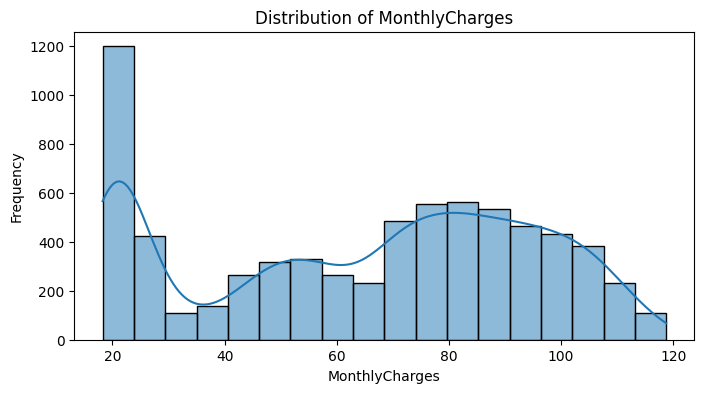

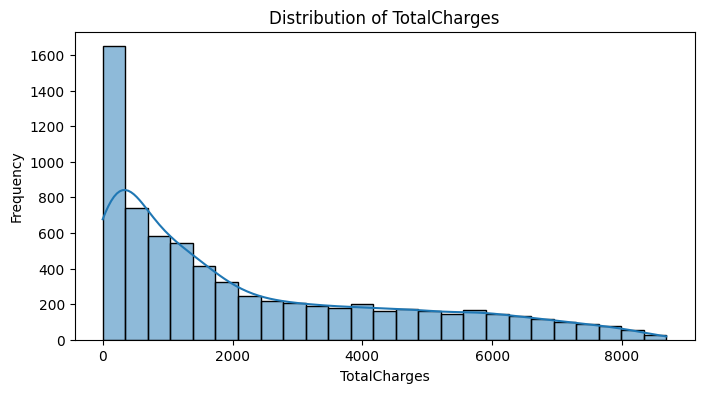

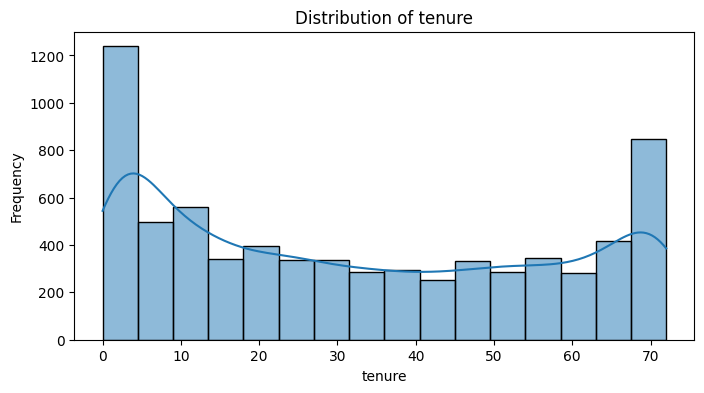

In [33]:
# Lets plot histograms for the numerical columns
numerical_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

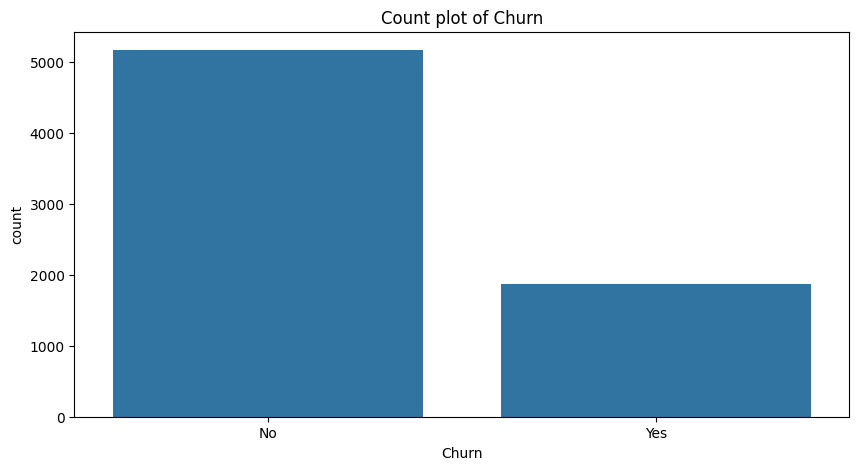

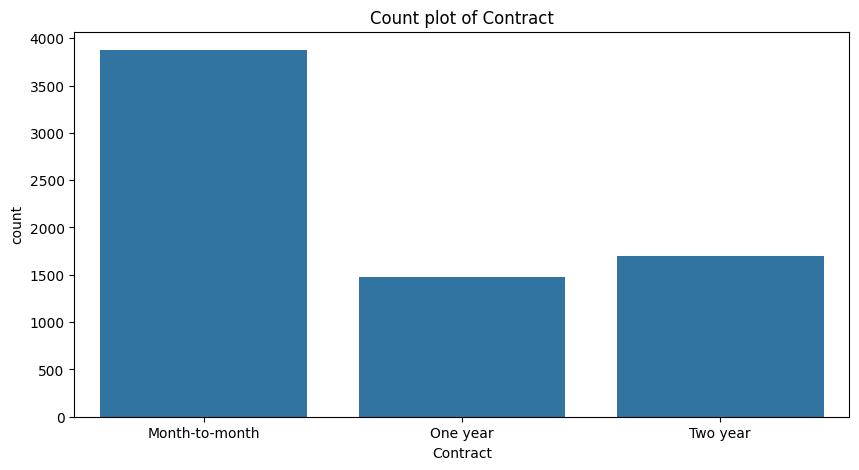

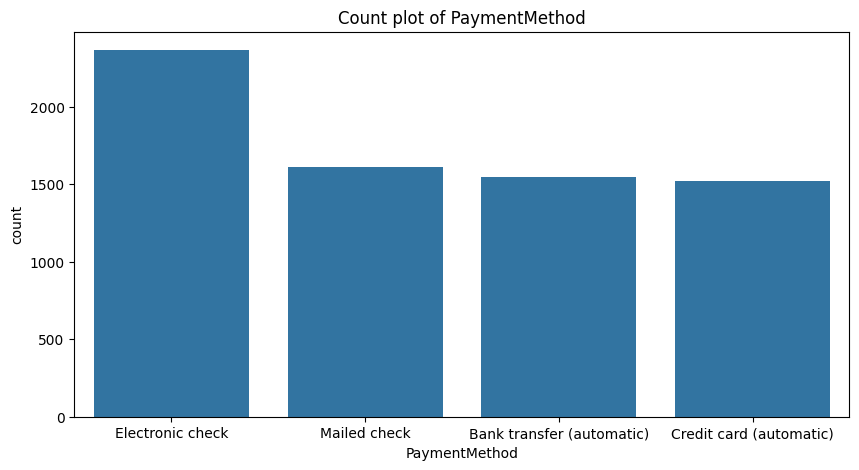

In [34]:
# Plot count plots for some key Categorical Columns
cat_columns = ['Churn', 'Contract', 'PaymentMethod']
for col in cat_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
    plt.show()

In [35]:
# Save df to csv for next notebook
df.to_pickle('/Users/noah/Data Analysis Portfolio Projects/ML - Subscription Churn Predition Project/data/Subscription-Churn-DataLoad-Modified.pk1')